In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


In [20]:
# Loading the dataset
df = pd.read_csv("Employee.csv")  

In [21]:
# Data Exploration
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [23]:
df.describe() 

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [24]:
df.nunique()

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

In [25]:
#Rename columns
df.columns = ['Company_Name', 'Emp_Age', 'Monthly_Salary', 'City', 'Nationality', 'Gender_Identity']
df.columns

Index(['Company_Name', 'Emp_Age', 'Monthly_Salary', 'City', 'Nationality',
       'Gender_Identity'],
      dtype='object')

In [26]:
# Data cleaning
# Handling Missing Values
print(df.isnull().sum()) 

Company_Name        8
Emp_Age            18
Monthly_Salary     24
City               14
Nationality         0
Gender_Identity     0
dtype: int64


In [27]:
# Replace missing values in Age and Salary
# Replace age 0 with NaN
df.loc[df['Emp_Age'] == 0, 'Emp_Age'] = np.nan 


In [30]:
# Choose mean/median/mode
imputer = SimpleImputer(strategy="mean") 
df[['Emp_Age', 'Monthly_Salary']] = imputer.fit_transform(df[['Emp_Age', 'Monthly_Salary']])

In [31]:
# Remove duplicate rows:
df.drop_duplicates(inplace=True)

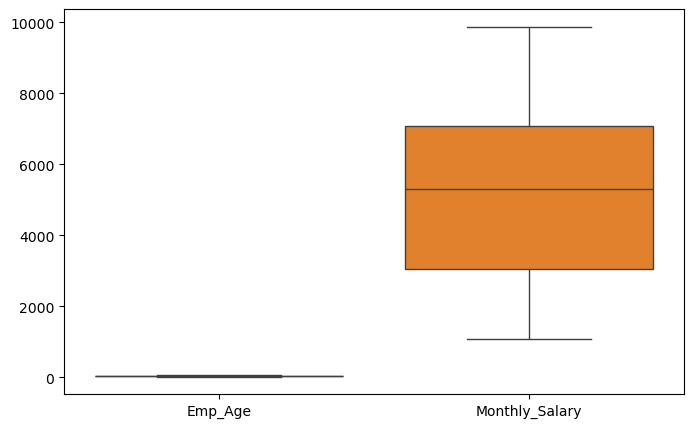

In [33]:
#Finding Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Emp_Age', 'Monthly_Salary']])
plt.show()


In [34]:
#Data Analysis
# Filter the dataset:
filtered_data = df[(df['Emp_Age'] > 40) & (df['Monthly_Salary'] < 5000)]
filtered_data

,Company_Name,Emp_Age,Monthly_Salary,City,Nationality,Gender_Identity
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


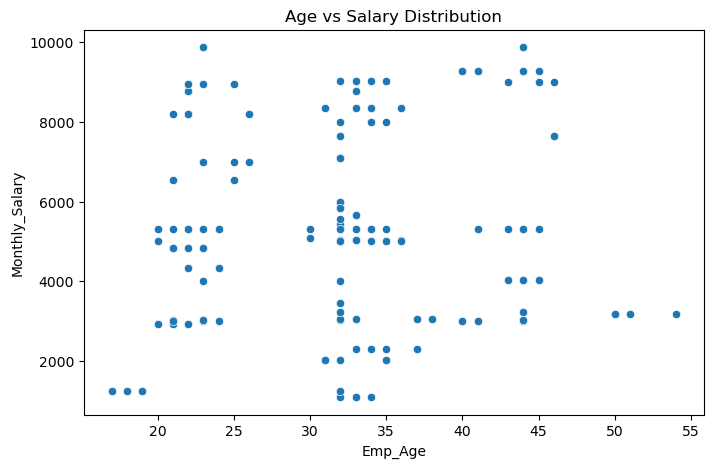

In [35]:
#Visualize age vs salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Emp_Age', y='Monthly_Salary', data=df)
plt.xlabel("Emp_Age")
plt.ylabel("Monthly_Salary")
plt.title("Age vs Salary Distribution")
plt.show()


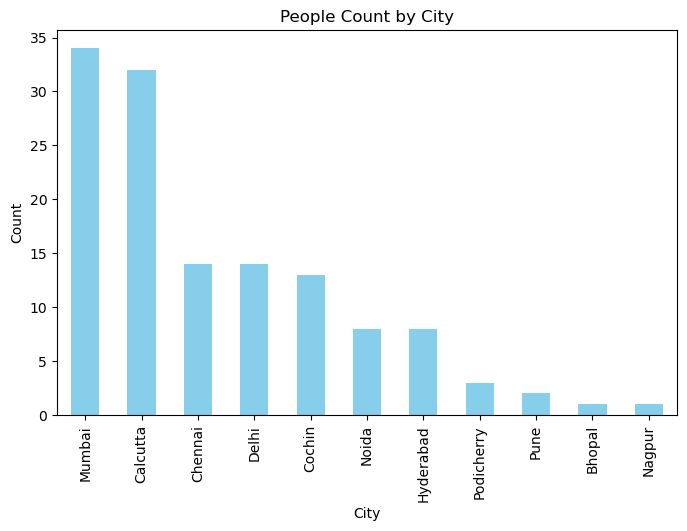

In [36]:
#Count people per location
df['City'].value_counts().plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.xlabel("City")
plt.ylabel("Count")
plt.title("People Count by City")
plt.xticks(rotation=90)
plt.show()


In [37]:
# Data Encoding
# Convert categorical variables into numerical
df_encoded = pd.get_dummies(df, columns=['Company_Name', 'City', 'Nationality', 'Gender_Identity'], drop_first=True)
df_encoded

,Emp_Age,Monthly_Salary,Company_Name_Congnizant,Company_Name_Infosys,Company_Name_Infosys Pvt Lmt,Company_Name_TCS,Company_Name_Tata Consultancy Services,City_Calcutta,City_Chennai,City_Cochin,City_Delhi,City_Hyderabad,City_Mumbai,City_Nagpur,City_Noida,City_Podicherry,City_Pune,Gender_Identity_1
0,20.0,5312.467742,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
1,30.0,5312.467742,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,35.0,2300.000000,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3,40.0,3000.000000,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,23.0,4000.000000,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.000000,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
143,33.0,9024.000000,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.000000,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
146,33.0,5034.000000,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True


In [38]:
#Feature Scaling
#Applying StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

df[['Emp_Age', 'Monthly_Salary']] = scaler_standard.fit_transform(df[['Emp_Age', 'Monthly_Salary']])
df[['Emp_Age', 'Monthly_Salary']] = scaler_minmax.fit_transform(df[['Emp_Age', 'Monthly_Salary']])
df[['Emp_Age', 'Monthly_Salary']] 

,Emp_Age,Monthly_Salary
0,0.081081,0.480650
1,0.351351,0.480650
2,0.486486,0.137817
3,0.621622,0.217480
4,0.162162,0.331285
...,...,...
142,0.135135,0.809491
143,0.432432,0.903039
145,0.729730,0.335154
146,0.432432,0.448959
